# Chapter 9 - Letting Your Data Speak for Itself with Machine Learning

* Understanding clustering 
* Finding the optimal number of clusters 
* Clustering countries by population 
* Preparing data with Scikit-learn 
* Creating an interactive KMeans clustering app 

In [1]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import dash
import jupyter_dash as jd
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Output, Input, State
from dash.exceptions import PreventUpdate
from dash_table import DataTable
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
import sklearn
pd.options.display.max_columns = None

for p in [plotly, dash, jd, dcc, html, dbc, pd, np, sklearn]:
    print(f'{p.__name__:-<30}v{p.__version__}')

plotly------------------------v4.14.3
dash--------------------------v1.20.0
jupyter_dash------------------v0.4.0
dash_core_components----------v1.16.0
dash_html_components----------v1.1.3
dash_bootstrap_components-----v0.12.0
pandas------------------------v1.2.3
numpy-------------------------v1.20.1
sklearn-----------------------v0.24.1


In [2]:
poverty = pd.read_csv('../data/poverty.csv', low_memory=False)
poverty.head(3)

Country Name Country Code  year  \
0  Afghanistan          AFG  1974   
1  Afghanistan          AFG  1975   
2  Afghanistan          AFG  1976   

   Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)  \
0                                                NaN                                        
1                                                NaN                                        
2                                                NaN                                        

   Annualized growth in per capita real survey mean consumption or income, top 10% (%)  \
0                                                NaN                                     
1                                                NaN                                     
2                                                NaN                                     

   Annualized growth in per capita real survey mean consumption or income, top 60% (%)  \
0                                                NaN                                     
1                                                NaN                                     
2                                                NaN                                     

   Annualized growth in per capita real survey mean consumption or income, total population (%)  \
0                                                NaN                                              
1                                                NaN                                              
2                                                NaN                                              

   Annualized growth in per capita real survey median income or consumption expenditure (%)  \
0                                                NaN                                          
1                                                NaN                                          
2                                                NaN                                          

   GINI index (World Bank estimate)  \
0                               NaN   
1                               NaN   
2                               NaN   

   Growth component of change in poverty at $1.90 a day (2011 PPP) (% of change)  \
0                                                NaN                               
1                                                NaN                               
2                                                NaN                               

   Growth component of change in poverty at $3.20 a day (2011 PPP) (% of change)  \
0                                                NaN                               
1                                                NaN                               
2                                                NaN                               

   Growth component of change in poverty at $5.50 a day (2011 PPP) (% of change)  \
0                                                NaN                               
1                                                NaN                               
2                                                NaN                               

   Income share held by fourth 20%  Income share held by highest 10%  \
0                              NaN                               NaN   
1                              NaN                               NaN   
2                              NaN                               NaN   

   Income share held by highest 20%  Income share held by lowest 10%  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   

   Income share held by lowest 20%  Income share held by second 20%  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                    

In [3]:
sizes = np.array([1, 2, 3, 4, 5, 7, 9, 11]).reshape(-1, 1)
sizes

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 7],
       [ 9],
       [11]])

In [4]:
kmeans1 = KMeans(n_clusters=1)
kmeans1.fit(sizes)

KMeans(n_clusters=1)

In [5]:
kmeans1.cluster_centers_

array([[5.25]])

In [6]:
sizes.mean()

5.25

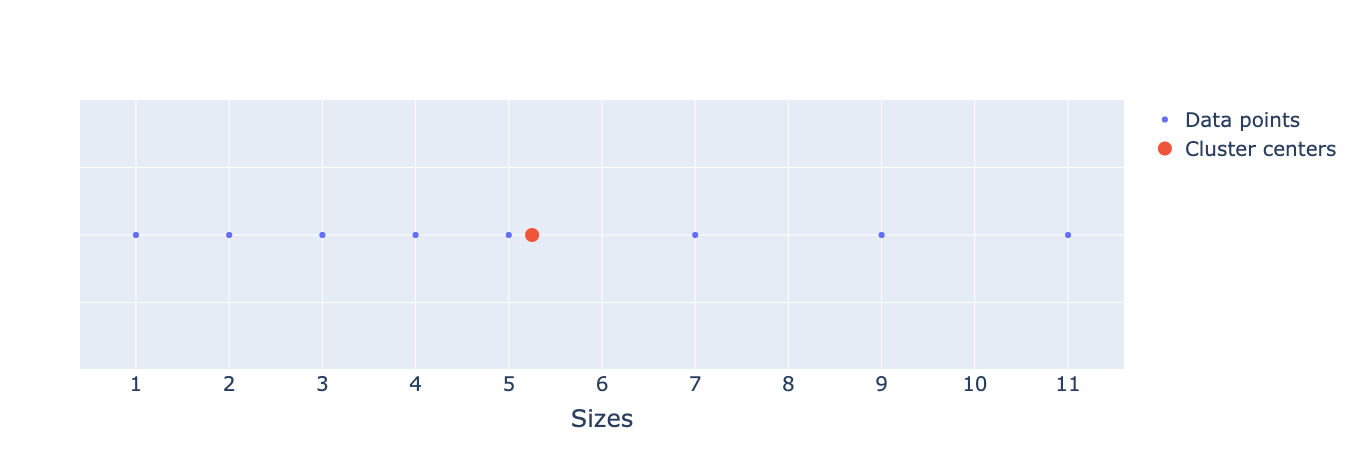

In [7]:
fig = go.Figure()
fig.add_scatter(x=sizes.flatten(),
                y=[1 for i in range(len(sizes))],
                mode='markers',
                name='Data points')
fig.add_scatter(x=kmeans1.cluster_centers_.flatten(),
                y=[1],
                mode='markers',
                marker={'size': 14},
                name='Cluster centers')
fig.layout.xaxis.tickvals = list(range(1, 12))
fig.layout.xaxis.title = 'Sizes'
fig.layout.yaxis.showticklabels = False
fig.layout.font.size = 20
fig

> Inertia: Sum of squared distances of samples to their closest cluster center.

In [8]:
kmeans1.inertia_

85.5

In [9]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(sizes)

KMeans(n_clusters=2)

In [10]:
kmeans2.cluster_centers_

array([[3.],
       [9.]])

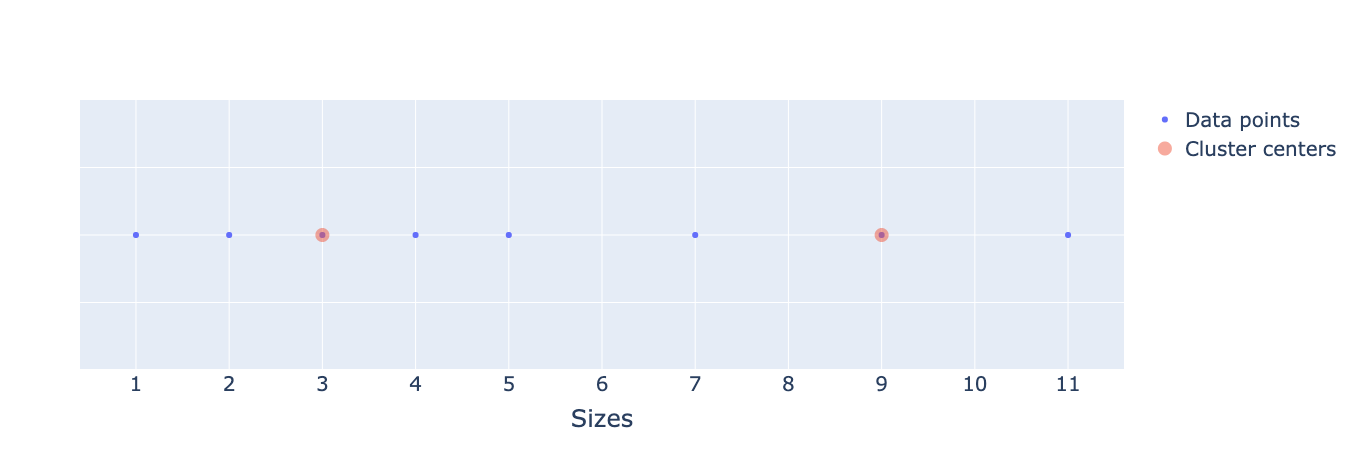

In [11]:
fig = go.Figure()
fig.add_scatter(x=sizes.flatten(),
                y=[1 for i in range(len(sizes))],
                mode='markers',
                name='Data points')
fig.add_scatter(x=kmeans2.cluster_centers_.flatten(),
                y=[1, 1],
                mode='markers',
                marker={'size': 14, 'opacity': 0.5},
                name='Cluster centers')

fig.layout.yaxis.range = [0, 2]
fig.layout.xaxis.tickvals = list(range(1, 12))
fig.layout.yaxis.showticklabels =False
fig.layout.xaxis.title = 'Sizes'
fig.layout.font.size = 20
fig

In [12]:
kmeans2.labels_

array([0, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

In [13]:
list(zip(sizes, kmeans2.labels_))

[(array([1]), 0),
 (array([2]), 0),
 (array([3]), 0),
 (array([4]), 0),
 (array([5]), 0),
 (array([7]), 1),
 (array([9]), 1),
 (array([11]), 1)]

In [14]:
kmeans2.labels_

array([0, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

In [15]:
kmeans2.cluster_centers_

array([[3.],
       [9.]])

In [16]:
kmeans2.inertia_

18.0

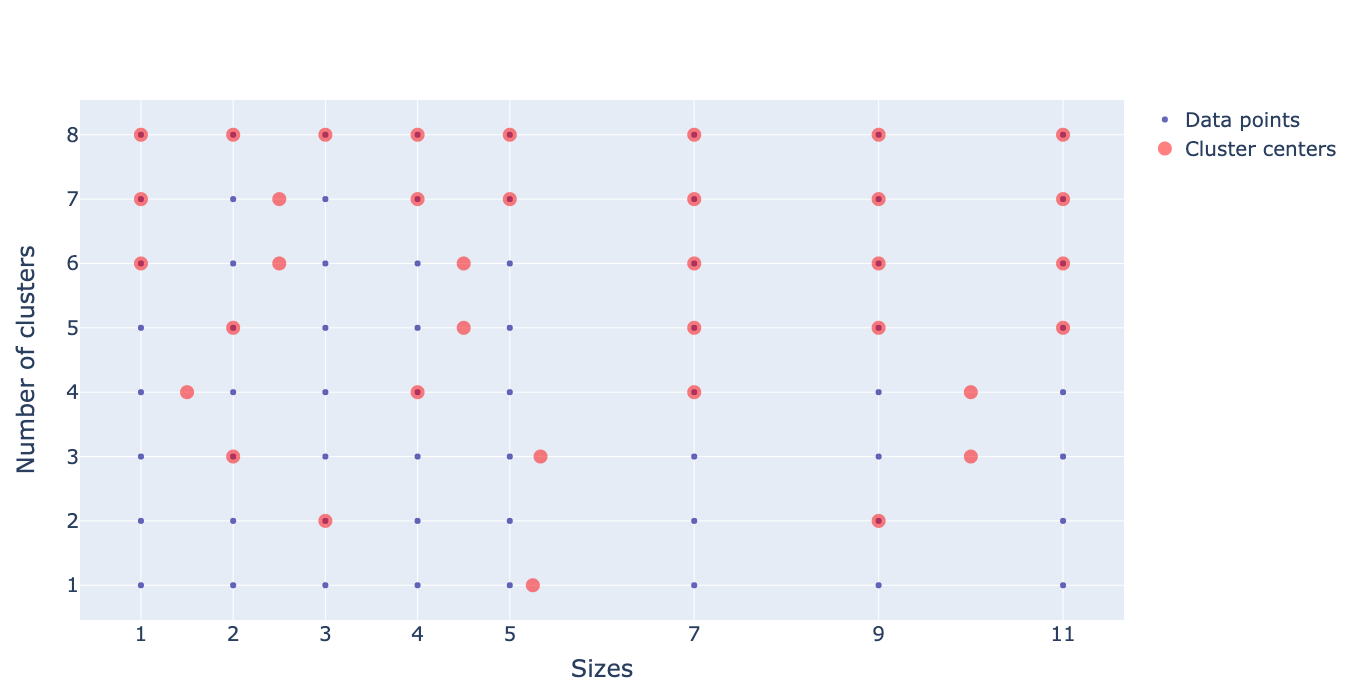

In [17]:
fig = go.Figure()

for i in range(1, 9):
    kmeans = KMeans(i)
    kmeans.fit(sizes)
    fig.add_scatter(x=sizes.flatten(),
                    y=[i] * len(sizes),
                    mode='markers',
                    marker={'color': 'darkblue', 'opacity': 0.6},
                    name='Data points', 
                    showlegend=True if i==1 else False)
    fig.add_scatter(x=kmeans.cluster_centers_.flatten(),
                    y=[i] * len(kmeans.cluster_centers_.flatten()),
                    mode='markers',
                    marker={'size': 14, 'color': 'red', 'opacity': 0.5},
                    showlegend=True if i==1 else False,
                    name='Cluster centers')

fig.layout.xaxis.tickvals = sizes.flatten()
fig.layout.xaxis.title = 'Sizes'
fig.layout.yaxis.title = 'Number of clusters'
fig.layout.height = 700
fig.layout.font.size = 20
fig

In [18]:
inertia = []
for i in range(1, 9):
    kmeans = KMeans(i)
    kmeans.fit(sizes)
    inertia.append(kmeans.inertia_)
inertia

[85.5, 18.0, 8.666666666666668, 4.5, 2.5, 1.0, 0.5, 0.0]

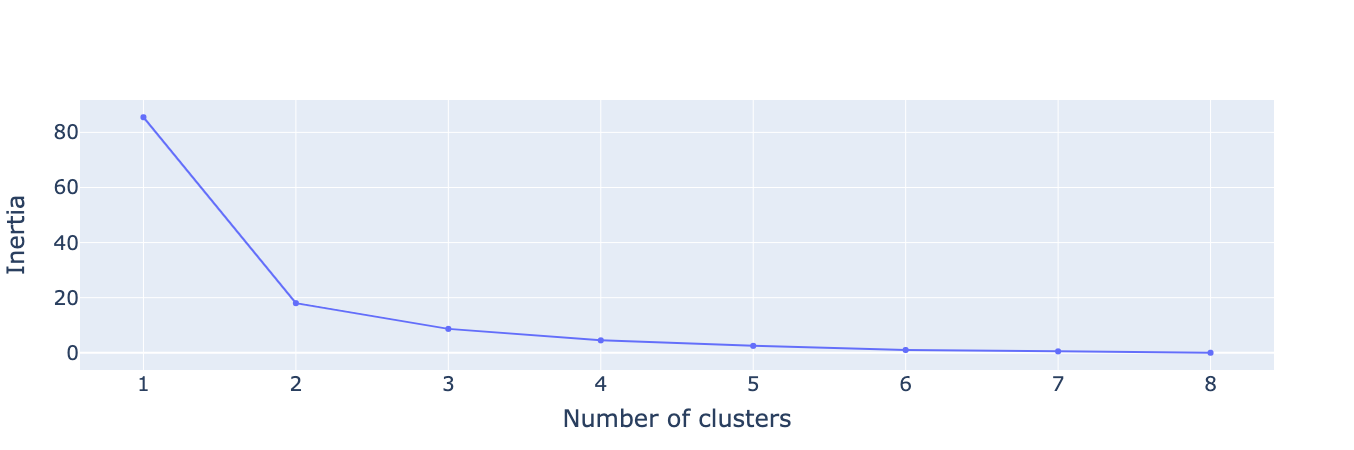

In [19]:
fig = go.Figure()

fig.add_scatter(x=list(range(1, 9)), y=inertia)
fig.layout.xaxis.title = 'Number of clusters'
fig.layout.yaxis.title = 'Inertia'
fig.layout.font.size = 20
fig

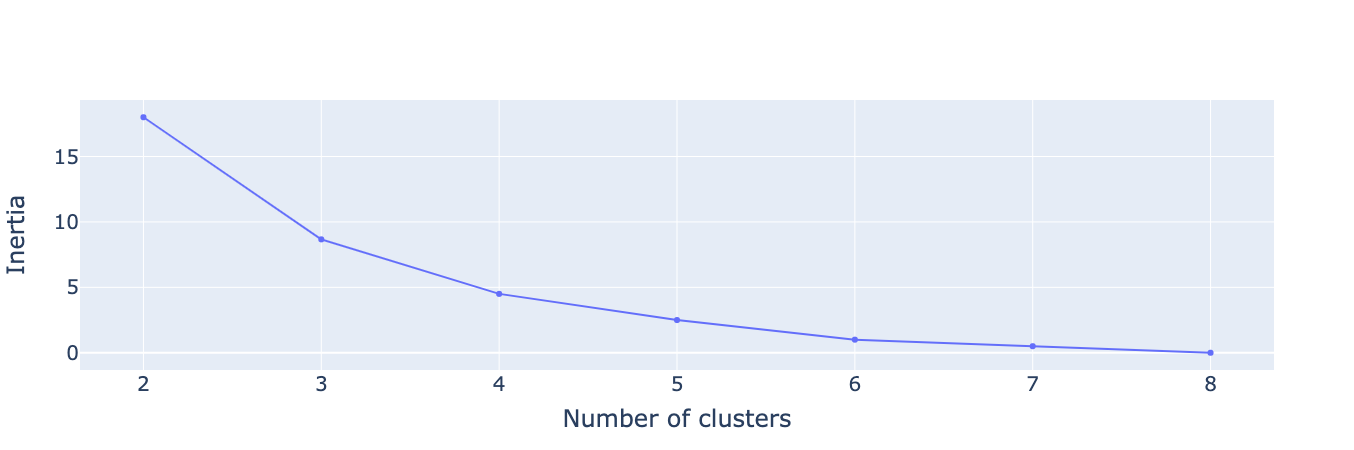

In [20]:
fig = go.Figure()

fig.add_scatter(x=list(range(2, 9)), y=inertia[1:])
fig.layout.xaxis.title = 'Number of clusters'
fig.layout.yaxis.title = 'Inertia'
fig.layout.font.size = 20
fig

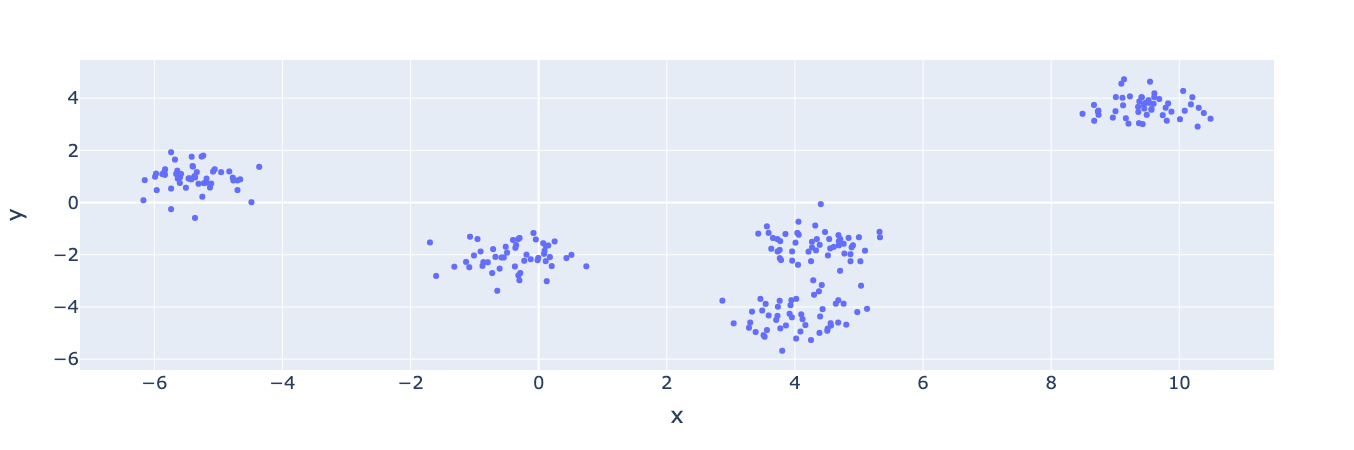

In [21]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=250, centers=5,
                  cluster_std=0.50, random_state=123)
fig = px.scatter(x=x[:, 0], y=x[:, 1])
fig.layout.font.size = 18
fig

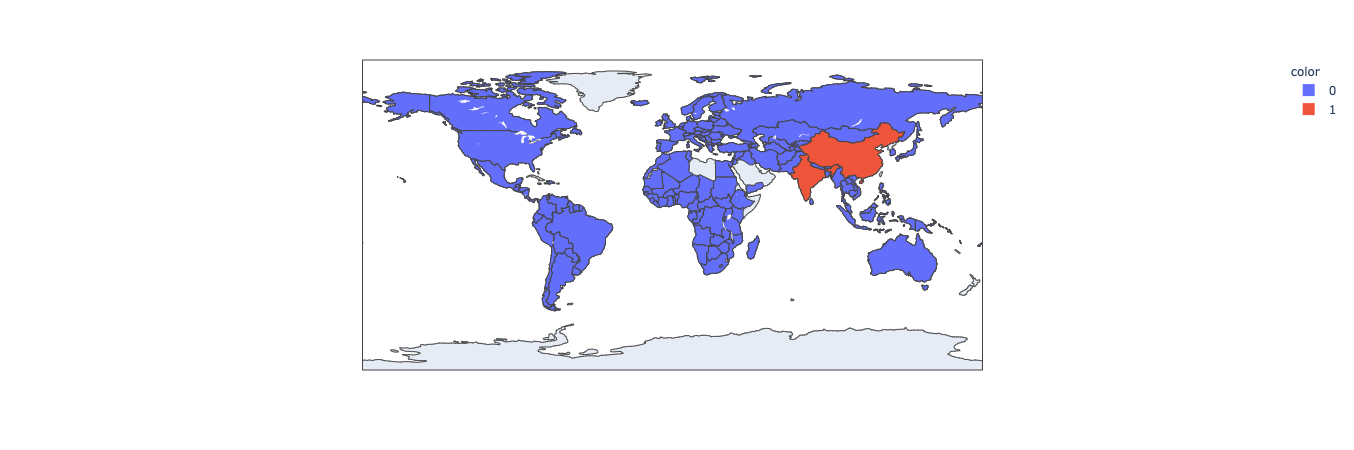

In [22]:
year = 2018
df = poverty[poverty['year'].eq(year) & poverty['is_country']]
indicators = ['Population, total']


kmeans = KMeans(n_clusters=2)
kmeans.fit(df['Population, total'].values.reshape(-1, 1))


px.choropleth(df,
              locations='Country Name',
              locationmode='country names',
              color=[str(x) for x in  kmeans.labels_])

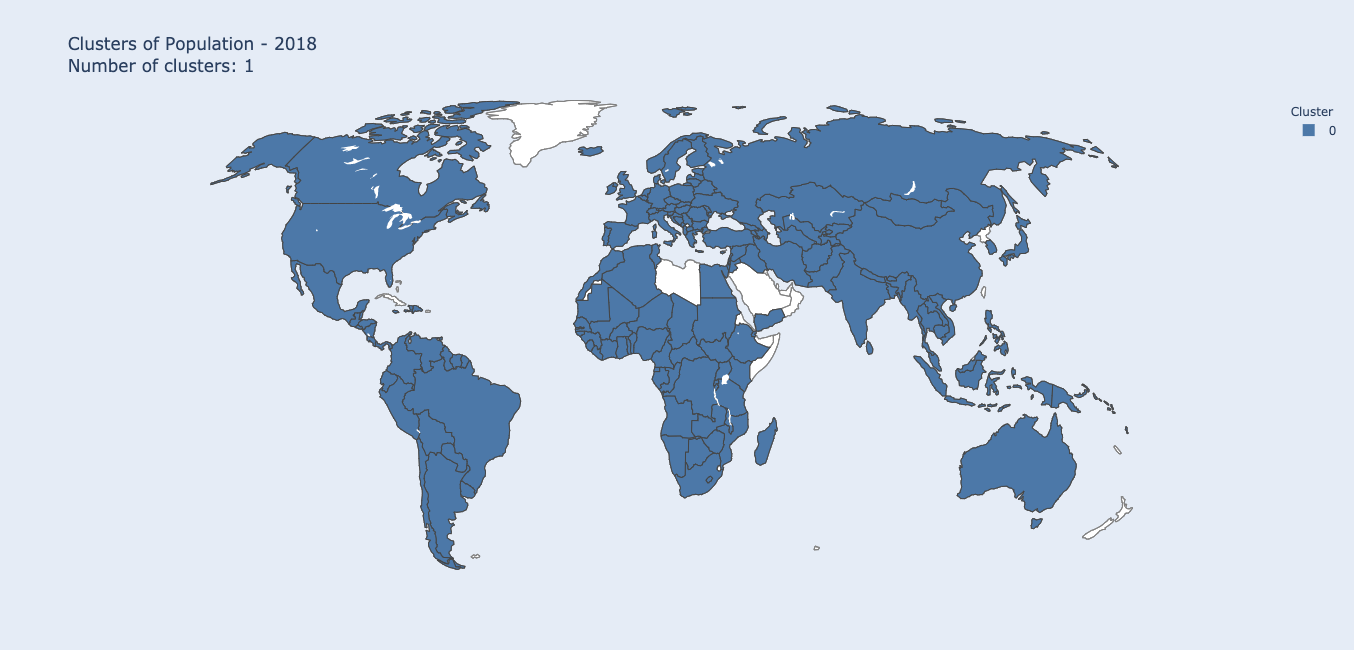

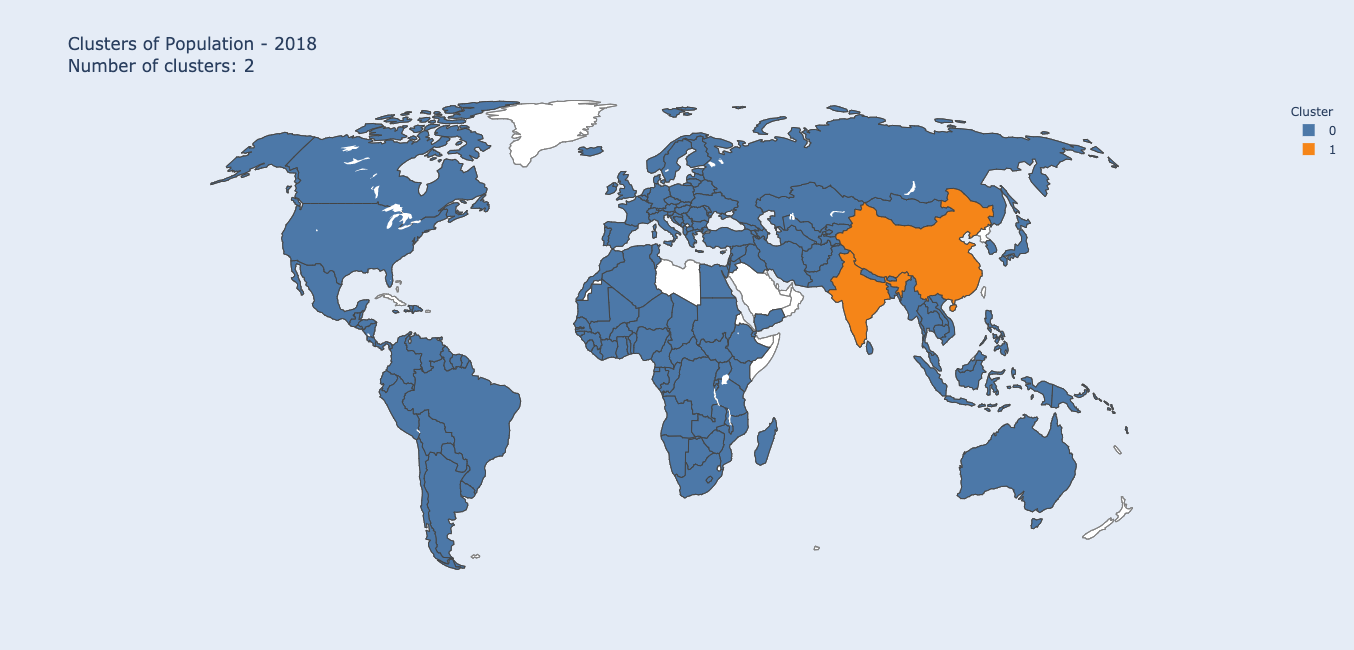

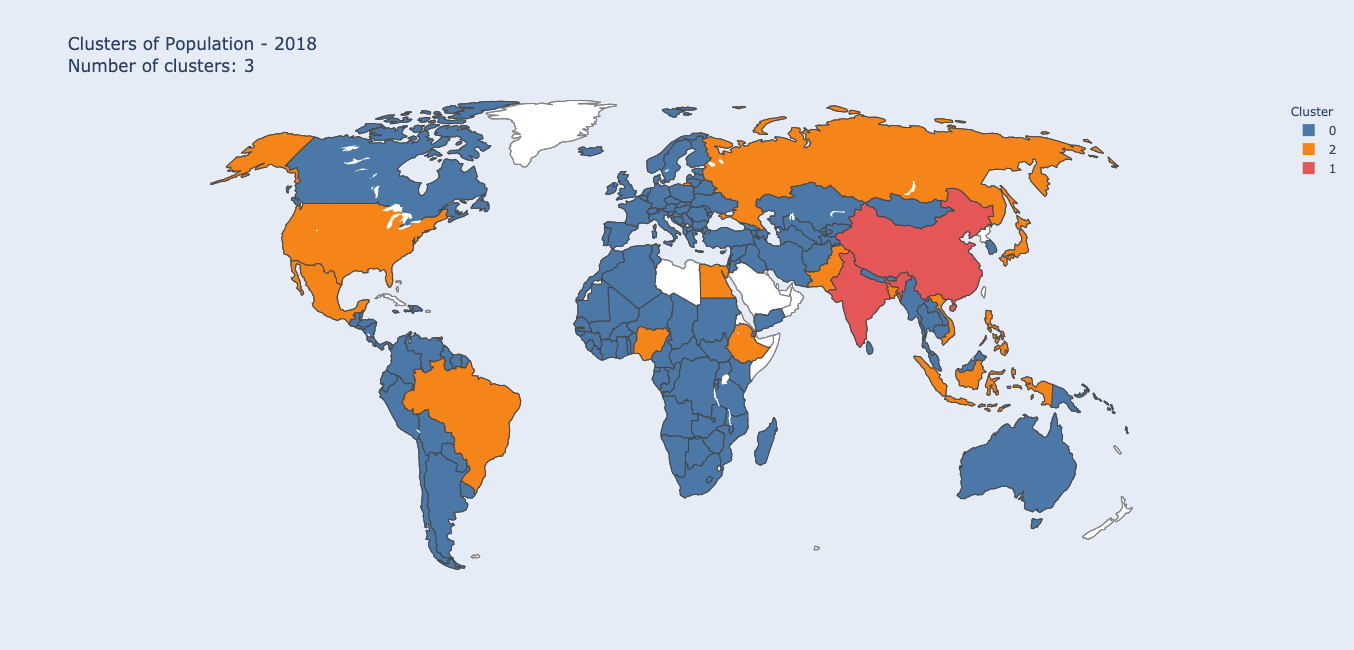

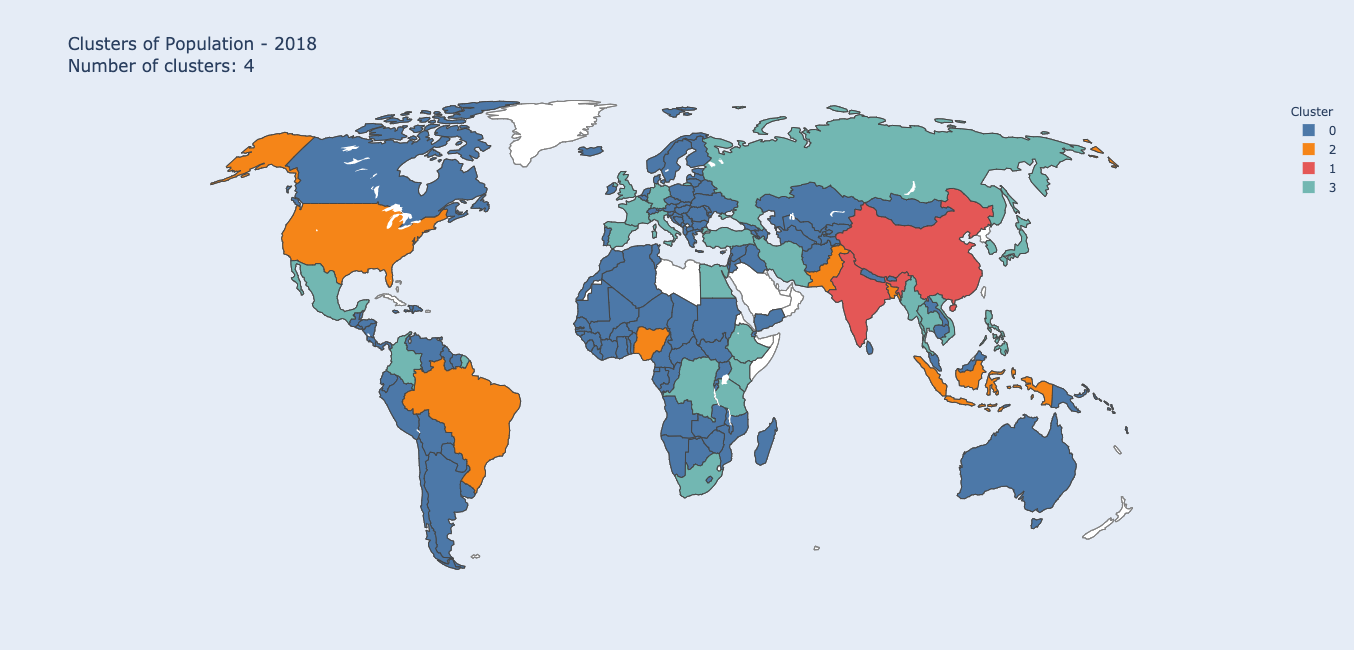

In [23]:
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, random_state=123)
    data = df[indicators].values
    kmeans.fit(data)
    fig = px.choropleth(df,
                        locations='Country Name',
                        locationmode='country names',
                        color=[str(x) for x in  kmeans.labels_], 
                        hover_data=['Population, total'],
                        labels={'color': 'Cluster'},
                        height=650,
                        title=f'Clusters of Population - 2018<br>Number of clusters: {i}',
                        color_discrete_sequence=px.colors.qualitative.T10)
    fig.layout.geo.showframe = False
    fig.layout.geo.showcountries = True
    fig.layout.geo.projection.type = 'natural earth'
    fig.layout.geo.lataxis.range = [-53, 76]
    fig.layout.geo.lonaxis.range = [-137, 168]
    fig.layout.geo.landcolor = 'white'
    fig.layout.geo.bgcolor = '#E5ECF6'

    fig.layout.paper_bgcolor = '#E5ECF6'
    fig.layout.geo.countrycolor = 'gray'
    fig.layout.geo.coastlinecolor = 'gray'


    fig.show()

In [24]:
(df
 .assign(cluster=kmeans.labels_)
 .sort_values(['Population, total'],ascending=False)
 [['Country Name','Population, total', 'cluster']]
 .groupby('cluster').head()
 .reset_index(drop=True)
 .style.format({'Population, total': '{:,.0f}'})
 .set_caption("<b>Top five contries by population per cluster - 2018</b>"))

In [25]:
data = np.array([1, 2, 1, 2, np.nan]).reshape(-1, 1)
data

array([[ 1.],
       [ 2.],
       [ 1.],
       [ 2.],
       [nan]])

In [26]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp.fit(data)
imp.transform(data)

array([[1. ],
       [2. ],
       [1. ],
       [2. ],
       [1.5]])

In [27]:
data = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
data

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

In [29]:

centers = []
inertia = []

for i in range(5, 6):
    kmeans = KMeans(n_clusters=i)
    data = poverty[poverty['year'].eq(year) & poverty['is_country']][indicators].values
    data_no_na = imp.fit_transform(data)
    scaled_data = scaler.fit_transform(data_no_na)
    kmeans.fit(scaled_data)
    print(f'Running with {i} clusters.')
    centers.append(kmeans.cluster_centers_)
    inertia.append(kmeans.inertia_)

Running with 5 clusters.


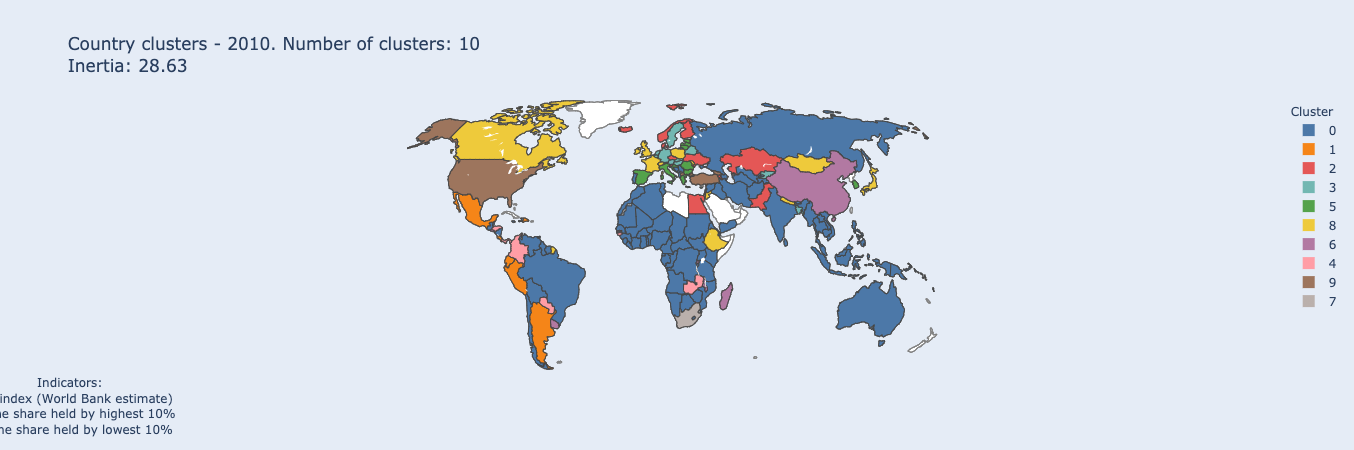

In [30]:

indicators = ['GINI index (World Bank estimate)',
              'Income share held by highest 10%', 
              'Income share held by lowest 10%']
year = 2000

n_clusters = 4
def plot_clustered_map(n_clusters, year, indicators):

    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=n_clusters)
    
    df = poverty[poverty['is_country'] & poverty['year'].eq(year)][indicators + ['Country Name', 'year']]
    data = df[indicators]
    data_no_na = imp.fit_transform(data)
    scaled_data = scaler.fit_transform(data_no_na)
    kmeans.fit(scaled_data)

    fig = px.choropleth(df,
                  locations='Country Name',
                        locationmode='country names',
                  color=[str(x) for x in  kmeans.labels_], 
                  labels={'color': 'Cluster'},
                  title=f'Country clusters - {year}. Number of clusters: {n_clusters}<br>Inertia: {kmeans.inertia_:,.2f}',
                  color_discrete_sequence=px.colors.qualitative.T10)
    fig.add_annotation(x=-0.1, y=-0.25, 
                       xref='paper', yref='paper',
                       text='Indicators:<br>' + "<br>".join(indicators), 
                       showarrow=False)
    fig.layout.geo.showframe = False
    fig.layout.geo.showcountries = True
    fig.layout.geo.projection.type = 'natural earth'
    fig.layout.geo.lataxis.range = [-53, 76]
    fig.layout.geo.lonaxis.range = [-137, 168]
    fig.layout.geo.landcolor = 'white'
    fig.layout.geo.bgcolor = '#E5ECF6'

    fig.layout.paper_bgcolor = '#E5ECF6'
    fig.layout.geo.countrycolor = 'gray'
    fig.layout.geo.coastlinecolor = 'gray'


    return fig
    
plot_clustered_map(10, 2010, indicators)



In [31]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.COSMO])

df = poverty[poverty['is_country']]

app.layout = html.Div([
    html.Br(),
    dbc.Row([
        dbc.Col([
            dbc.Label('Select the year:'),
            dcc.Slider(id='year_cluster_slider',
                       min=1974, max=2018, step=1, included=False,
                       value=2018,
                       marks={year: str(year)
                              for year in range(1974, 2019, 5)})
        ], lg=7, md=12),
        dbc.Col([
            dbc.Label('Select the number of clusters:'),
            dcc.Slider(id='ncluster_cluster_slider',
                       min=2, max=15, step=1, included=False,
                       value=4,
                       marks={n: str(n) for n in range(2, 16)}),
        ], lg=5, md=12)
    ]),
    html.Br(),
    dbc.Label('Select Indicators:'),
    dcc.Dropdown(id='cluster_indicator_dropdown',optionHeight=40,
                 multi=True,
                 value=['GINI index (World Bank estimate)'],
                 options=[{'label': indicator, 'value': indicator}
                          for indicator in poverty.columns[3:54]]),
    html.Br(),
    dcc.Graph(id='clustered_map_chart')

], style={'backgroundColor': '#E5ECF6'})

@app.callback(Output('clustered_map_chart', 'figure'),
              Input('year_cluster_slider', 'value'),
              Input('ncluster_cluster_slider', 'value'),
              Input('cluster_indicator_dropdown', 'value'))
def clustered_map(year, n_clusters, indicators):
    if not indicators:
        raise PreventUpdate
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=n_clusters)
    
    df = poverty[poverty['is_country'] & poverty['year'].eq(year)][indicators + ['Country Name', 'year']]
    data = df[indicators]
    if df.isna().all().any():
        return px.scatter(title='No available data for the selected combination of year/indicators.')
    data_no_na = imp.fit_transform(data)
    scaled_data = scaler.fit_transform(data_no_na)
    kmeans.fit(scaled_data)

    fig = px.choropleth(df,
                        locations='Country Name',
                        locationmode='country names',
                        color=[str(x) for x in  kmeans.labels_], 
                        labels={'color': 'Cluster'},
                        hover_data=indicators,
                        height=650,
                        title=f'Country clusters - {year}. Number of clusters: {n_clusters}<br>Inertia: {kmeans.inertia_:,.2f}',
                        color_discrete_sequence=px.colors.qualitative.T10)
    fig.add_annotation(x=-0.1, y=-0.15, 
                       xref='paper', yref='paper',
                       text='Indicators:<br>' + "<br>".join(indicators), 
                       showarrow=False)
    fig.layout.geo.showframe = False
    fig.layout.geo.showcountries = True
    fig.layout.geo.projection.type = 'natural earth'
    fig.layout.geo.lataxis.range = [-53, 76]
    fig.layout.geo.lonaxis.range = [-137, 168]
    fig.layout.geo.landcolor = 'white'
    fig.layout.geo.bgcolor = '#E5ECF6'
    fig.layout.paper_bgcolor = '#E5ECF6'
    fig.layout.geo.countrycolor = 'gray'
    fig.layout.geo.coastlinecolor = 'gray'
    return fig
    

app.run_server(mode='inline', height=1200, port=1234)